***Методы анализа неоднородных данных и паттерн-анализ***

***Дополнение к лекции 1***

**Задание 1**: Подросим монетку 10 раз. В результате выпало 8 решек и 2
орла. Протестируйте нулевую гипотезу о том, что монета
правильная, против альтернативы P(решка) > P(орел) на
основании p-value.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

Нулевая гипотеза: монета правильная, или на статистическом языке: $$H_0: P(орел) = P(решка)=0.5$$

Альтернатива задана исходя из наблюдаемых значений, известно, что выпало 8 решек и 2 орла, а значит разумно предполагать, что вероятность выпадения решки выше: $$H_1: P(решка)>P(орел)$$

Для проверки нулевой гипотезы возьмем статистику -- количество выпавших решек (в целом можно выбрать и количество выпавших орлов, результат от этого не изменится).

Проведенный эксперимент можно изначально представить как серию испытаний Бернулли. Каждый бросок монетки имеет потенциально два исхода: либо орел, либо решка. Исходы испытаний не зависят друг от друга. Вероятность "успеха" не меняется от испытания к испытанию. Таким образом, статистика имеет биномиальное распределение с параметрами n = 10 (общее количество испытаний Бернулли - бросков монетки), p = 0.5 (вероятность выпадения орла / решки при справедливой нулевой гипотезе).

Построим распределение статистики при верной нулевой гипотезе. ``Binom.pmf`` - Probability mass function, функция вероятности. Она возвращает вероятность того, что дискретная величина X, имеющая биномиальное распределение, примет определенное значение.

Для расчета вероятности по биномиальному распределению используется следующая формула:

$$P(X=k) = \frac{n!}{k!(n-k)!} p^{^k}(1 - p)^{n - k}$$

In [3]:
data = pd.DataFrame({'heads': [i for i in range(0, 11)],
                    'prob': [binom.pmf(k=i, n=10, p=0.5, loc=0) for i in range(0, 11)]})

In [4]:
data

,heads,prob
0,0,0.000977
1,1,0.009766
2,2,0.043945
3,3,0.117188
4,4,0.205078
5,5,0.246094
6,6,0.205078
7,7,0.117187
8,8,0.043945
9,9,0.009766


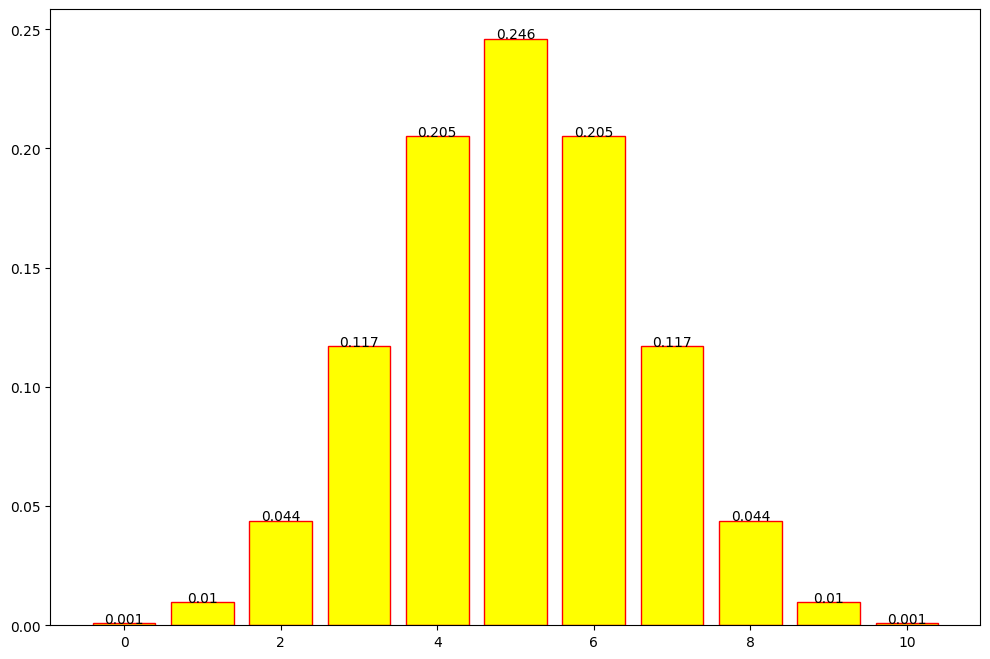

In [5]:
plt.figure(figsize=(12, 8))
plt.bar(data.heads, data.prob, color = 'yellow', edgecolor = 'red')

for i in range(len(data.prob)):
    plt.annotate(str(round(data.prob, 3)[i]), xy=(data.heads[i],data.prob[i]),
                 ha='center')

plt.show()

**Pvalue** -- это вероятность получить значение статистики критерия равное наблюдаемому или более нетипичное по сравнению с наблюдаемым при условии, что нулевая гипотеза верна. Так как альтернатива правосторонняя, критическая область справа, то есть нас интересует хвост справа от наблюдаемого значения. Зададим доверительную и критическую области. Далее на графике доверительная область будет закрашена зеленым цветом, а критическая - красным.

In [10]:
region = []

for i in data.heads:
    if i > 7:
        region.append('pvalue')
    else:
        region.append('confidence')

data['region'] = region

In [11]:
data

,heads,prob,region
0,0,0.000977,confidence
1,1,0.009766,confidence
2,2,0.043945,confidence
3,3,0.117188,confidence
4,4,0.205078,confidence
5,5,0.246094,confidence
6,6,0.205078,confidence
7,7,0.117187,confidence
8,8,0.043945,pvalue
9,9,0.009766,pvalue


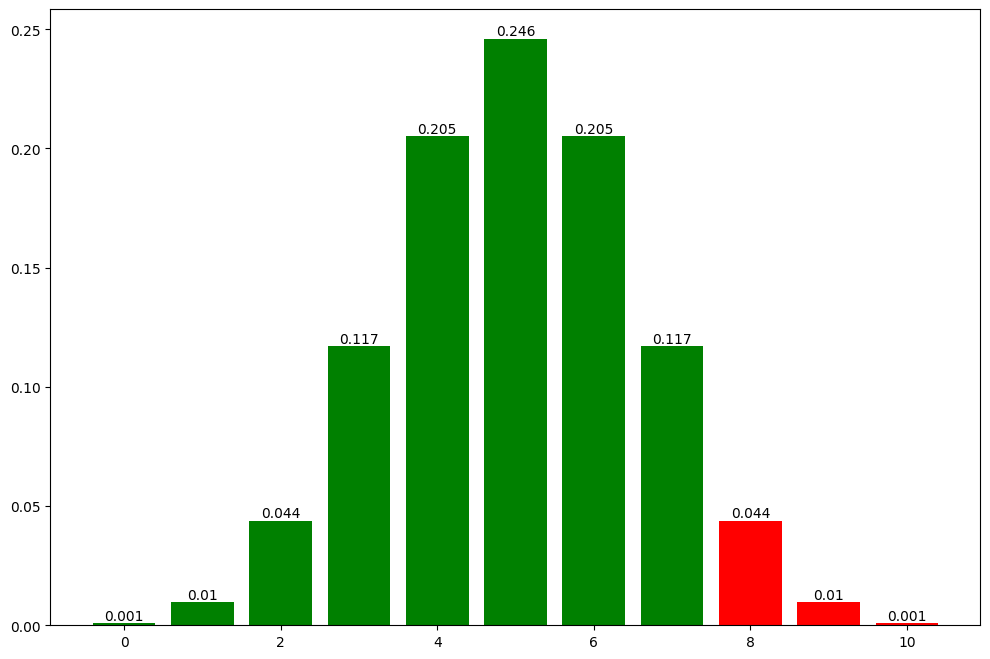

In [12]:
g = data.region == 'confidence'
mask2 = data.region == 'pvalue'

plt.figure(figsize=(12, 8))
plt.bar(data.heads[g], data.prob[g], color = 'green')
plt.bar(data.heads[mask2], data.prob[mask2], color = 'red')

for i in range(len(data.prob)):
    plt.annotate(str(round(data.prob, 3)[i]), xy=(data.heads[i],data.prob[i]),
                 ha='center', va='bottom')

plt.show()

Рассчитаем p-value:

In [13]:
pvalue = binom.pmf(8,10,0.5) + binom.pmf(9,10,0.5) + binom.pmf(10,10,0.5)
round(pvalue, 4)

0.0547

Или даже удобнее рассчитать сразу через survival function, то есть, посчитать вероятность того, что случайная величина превысит определенное значение (в нашем случае - 7):  

In [14]:
binom.sf(7, 10, 0.5)

0.0546875

В данном случае p-value больше 5%, так что можно сказать, что у нас нет оснований отвергнуть нулевую гипотезу. Монетка, по всей видимости, является правильной. Однако обращает на себя внимание, что размер выборки все-таки маленький.

Рассмотрим схожую задачу, однако в этом случае размер выборки будет достаточно большим для того, чтобы применить нормальную аппроксимацию статистики критерия (то есть, приблизить распределение статистики к нормальному).

**Задание 2**. Подросим монетку 150 раз. В результате выпало 28 орлов и 122 решки. Протестируйте нулевую гипотезу о том, что монета правильная, против разумной односторонней альтернативы на основании p-value. Как и в первой задаче, представим решение в Python, но уже используя нормальную аппроксимацию статистики критерия.

Аналогично, как и в прошлом задании, задаем нулевую гипотезу и альтернативу.

Нулевая гипотеза: монета правильная, или на статистическом языке: $$H_0: P(орел) = P(решка)=0.5$$

Решек выпало больше, значит разумно предполагать, что вероятность выпадения решки выше: $$H_1: P(решка)>P(орел)$$

Статистика (возьмем, к примеру, количество решек в качестве статистики) при верной нулевой гипотезе имеет биномиальное распределение, n = 150, p = 0.5. Так как выборка большая, можно аппроксимировать биномиальное распределение к нормальному. Математическое ожидание в этом случае составляет $np$, а дисперсия равна $np(1-p)$.

Построим ниже график нормального распределения. Зададим параметры n, p и пороговое значение 122 (наблюдаемое значение - количество выпавших решек). Критическую область зальем красным цветом.

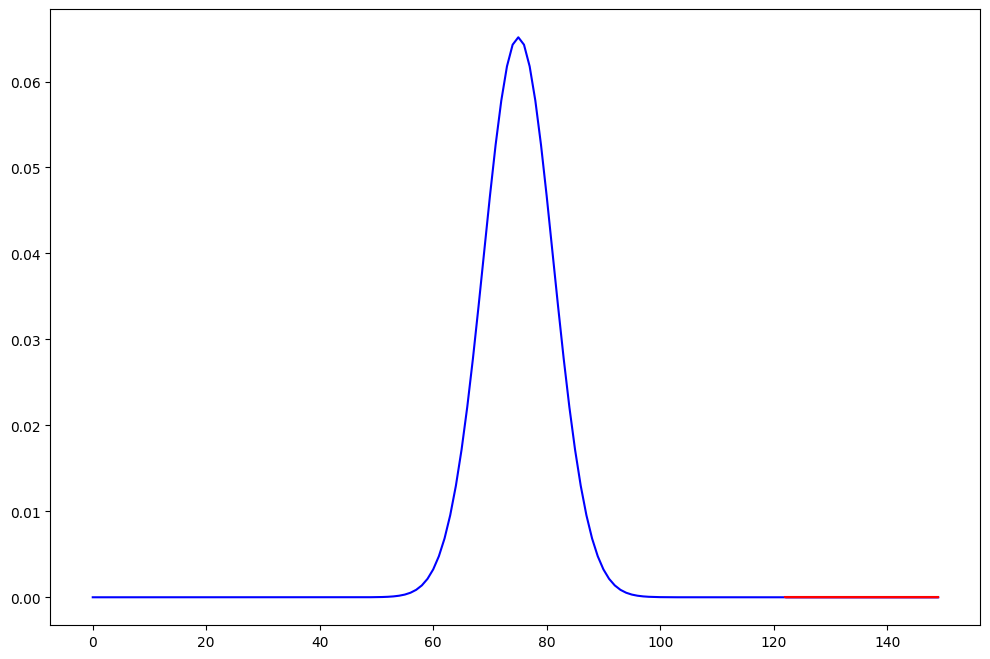

In [16]:
n = 150
p = 0.5
cutpoint = 122

x = np.arange(0, 150, 1)
y = norm.pdf(x,n*p,np.sqrt(n*p*(1-p)))

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b')
plt.plot(x[cutpoint:],y[cutpoint:],color ='red')
plt.fill_between(x,y,where = x>=cutpoint,color='red')

Рассчитаем pvalue: вероятность того, что статистика примет значения 122 и больше.

In [17]:
pvalue_2 = norm.sf(122, n*p, np.sqrt(n*p*(1-p)))
pvalue_2

8.266555109353107e-15

pvalue мало, следовательно, можно отвергнуть нулевую гипотезу, то есть, можно сделать вывод о том, что монетка не является правильной.